## Setup and Import Libraries

In [1]:
from langgraph.graph import StateGraph,START,END
from pydantic import BaseModel
from IPython.display import Image, display

## Pydantic Data Validation

In [2]:
class State(BaseModel):
    name:str

In [3]:
def example_node(state:State):
    return {"name":"Hello"}

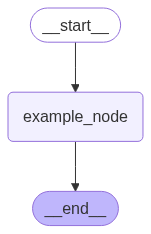

In [4]:
builder=StateGraph(State)

# Add Node
builder.add_node(node="example_node", action=example_node)

# Add Edges
builder.add_edge(start_key=START, end_key="example_node")
builder.add_edge(start_key="example_node", end_key=END)

# Compile Graph
compiled_graph = builder.compile()

# Display Graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [5]:
compiled_graph.invoke({"name":"Saad Tariq"})

{'name': 'Hello'}

In [6]:
compiled_graph.invoke({"name":123})

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type